## EXPLORATORY DATA ANALYSIS

In [1]:
#Import Essential Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

In [2]:
#Read the clean patient infor files and appropriately import the date time column
custome_date_parser = lambda x: datetime.strptime(x, '%y-%m-%d %H:%M:%S')
df_patient = pd.read_csv('clean_patient_info.csv', parse_dates= ['recording_date'], infer_datetime_format= True, index_col= 0)

In [3]:
df_patient.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6428 entries, 0 to 6427
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   diagnosi                      6428 non-null   object        
 1   ecg_id                        6428 non-null   int64         
 2   ritmi                         6428 non-null   object        
 3   patient_id                    6428 non-null   float64       
 4   age                           6428 non-null   float64       
 5   sex                           6428 non-null   int64         
 6   height                        6428 non-null   float64       
 7   weight                        6428 non-null   float64       
 8   recording_date                6428 non-null   datetime64[ns]
 9   heart_axis                    4124 non-null   object        
 10  second_opinion                6428 non-null   bool          
 11  initial_autogenerated_report  

In [4]:
df_patient.head()

,diagnosi,ecg_id,ritmi,patient_id,age,sex,height,weight,recording_date,heart_axis,second_opinion,initial_autogenerated_report,validated_by_human,electrodes_problems,Age_Group,Height_Group,Weight_Group
0,STACH,10900,VA,15654.0,54.0,0,166.796356,69.841845,1993-09-01 11:31:17,MID,False,True,False,no,"(0, 55]","(166, 167]","(60, 70]"
1,AFLT,10900,AF,15654.0,54.0,0,166.796356,69.841845,1993-09-01 11:31:17,MID,False,True,False,no,"(0, 55]","(166, 167]","(60, 70]"
2,SR,8209,SR,12281.0,55.0,0,166.796356,69.841845,1992-06-09 15:52:36,LAD,False,False,True,no,"(0, 55]","(166, 167]","(60, 70]"
3,STACH,17620,VA,2007.0,29.0,1,164.000000,56.000000,1997-02-08 18:33:30,NaN,False,False,True,no,"(0, 55]","(90, 166]","(50, 60]"
4,SBRAD,12967,VA,8685.0,57.0,0,166.796356,69.841845,1994-09-13 10:21:14,MID,False,True,False,no,"(55, 70]","(166, 167]","(60, 70]"


In [5]:
axis_label = {'size': 21, 'weight': 500}
ticks_label = {'size': 13}

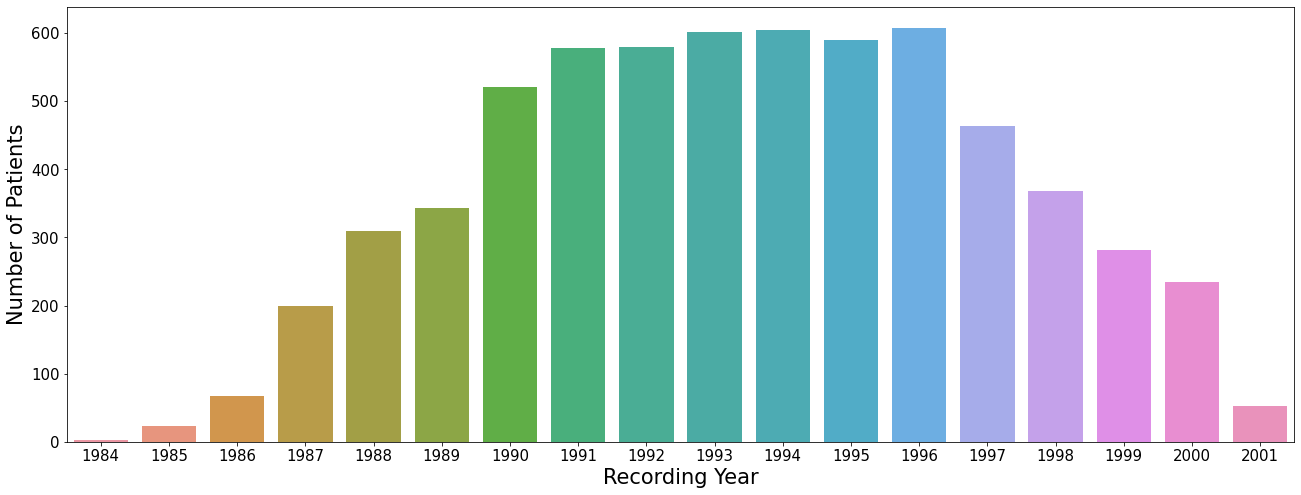

In [6]:
#Plot then number of patiants recordedd each year to see the trend patient recording
fig, ax = plt.subplots(figsize= (22, 8))
g= sns.countplot(x=df_patient['recording_date'].dt.year, ax= ax)

ax.set_xlabel('Recording Year', fontdict= axis_label)
ax.set_xticklabels(ax.get_xticklabels(), fontdict= ticks_label)

_= ax.set_ylabel('Number of Patients', fontdict= axis_label)

ax.tick_params(axis= 'both', labelsize= 15)



From the plot patient most patient where enrolled between 1990 and 1997. 

In [21]:
list(df_patient.ritmi.unique())

['VA', 'AF', 'SR']

In [22]:
AR_lebels = {'VA': 'Other Arrhythmias', 'AF': 'AFIB', 'SR': 'Normal'}

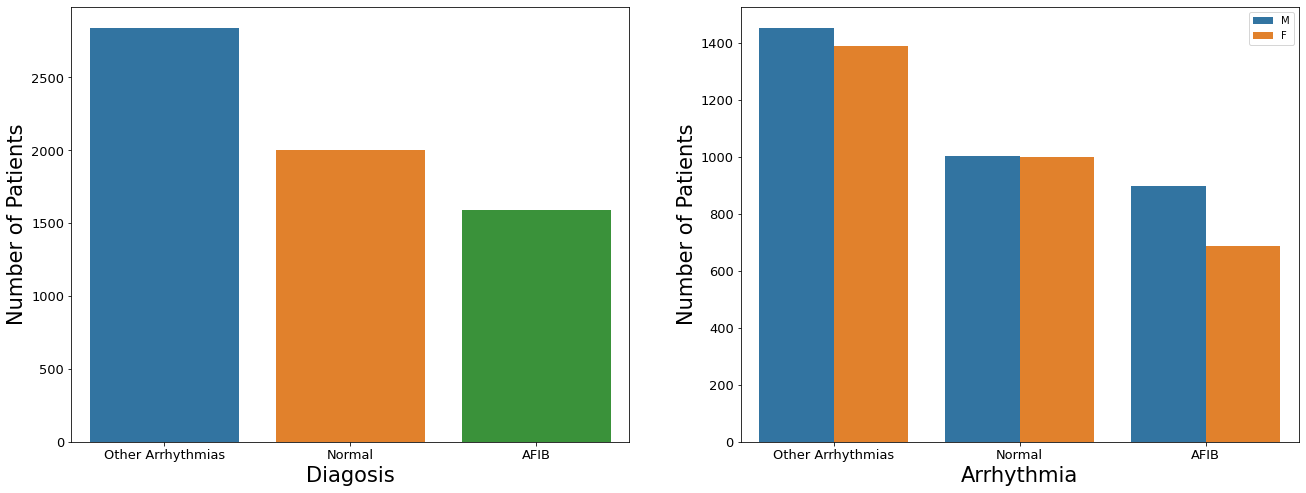

In [39]:
axis_label = {'size': 21, 'weight': 500}
ticks_label = {'size': 13}
fig, (ax1, ax2) = plt.subplots(figsize= (22, 8), ncols= 2, nrows= 1)
g1= sns.countplot(x= 'ritmi', data= df_patient, ax= ax1, order= df_patient.ritmi.value_counts().index)
g2= sns.countplot(x= 'ritmi', data= df_patient, ax= ax2, hue= 'sex', order= df_patient.ritmi.value_counts().index)



ax1.set_xlabel('Diagosis', fontdict=axis_label)
ax2.set_xlabel('Arrhythmia', fontdict= axis_label)

ax1.set_ylabel('Number of Patients', fontdict= axis_label)
ax2.set_ylabel('Number of Patients', fontdict= axis_label)

TickLabels = []

for L in list(df_patient.ritmi.value_counts().index):
    TickLabels.append(AR_lebels[L])

ax1.set_xticklabels(TickLabels)
ax2.set_xticklabels(TickLabels)

ax1.tick_params(axis= 'both', labelsize= ticks_label['size'])
ax2.tick_params(axis= 'both', labelsize= ticks_label['size'])

legend_text = ['M', 'F']
_= ax2.legend(legend_text)

The plot shows that the data is imbalance as most of the patients have other arrhythmia and the smallest number of patient have Afib. This may impact the result of the model and consideration should be giving to reblance the data.

Looking at the second plot the are same number of Male and Female patients that a normal. There are differences between AFIB and other arrhythmia patients. This suggest that the sex of the the patient may be significant in determining Arryhythmias

Perform and hypothesis to determine if the sex is significant

In [61]:
from scipy.stats import binomtest

AFIB_counts = df_patient[df_patient.ritmi == 'AF']['ritmi'].count()
AFIB_Fcounts = df_patient[df_patient.ritmi == 'AF']['sex'].sum()

result= binomtest(AFIB_Fcounts, n= AFIB_counts, p= 0.5)

print(f'The p-value is {result.pvalue}')

The p-value is 1.2994653028495518e-07


With a p-value smaller the 5% the result shows that sex is a significant factor.

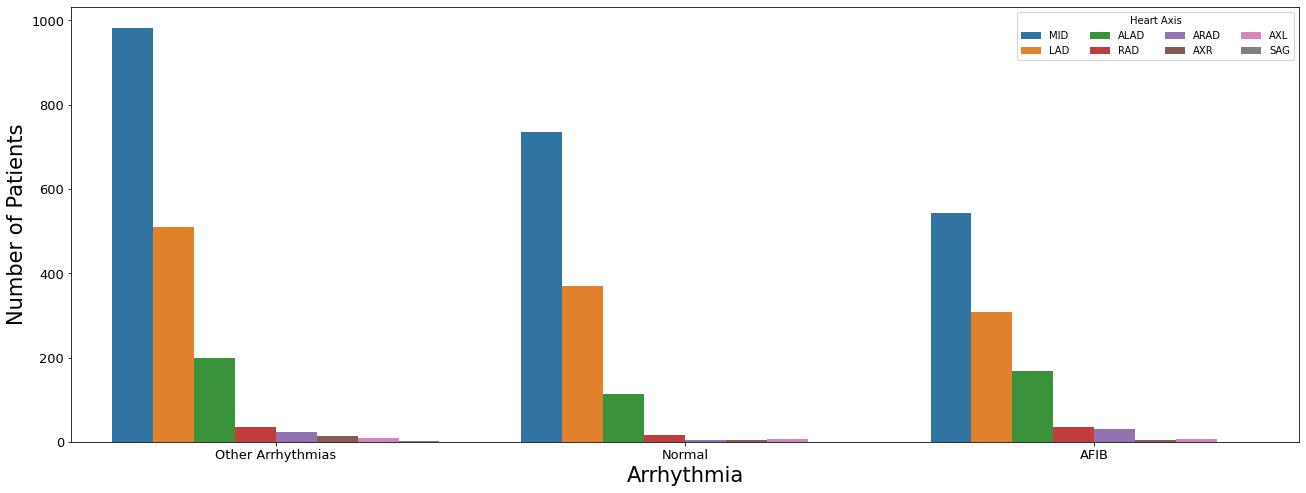

In [62]:
#plot heart axis
axis_label = {'size': 21, 'weight': 500}
ticks_label = {'size': 13}
fig, ax= plt.subplots(figsize= (22, 8))
g= sns.countplot(x= 'ritmi', data= df_patient, ax= ax, hue= 'heart_axis', order= df_patient.ritmi.value_counts().index)

ax.set_xlabel('Arrhythmia', fontdict= axis_label)
ax.set_ylabel('Number of Patients', fontdict= axis_label)

ax.set_xticklabels(['Other Arrhythmias', 'Normal', 'AFIB'])

ax.tick_params(axis= 'both', labelsize= ticks_label['size'])

ax.legend(ncol=4, title= "Heart Axis")

In general the Axis plot shows a specific trend (MID > LAD > ALAD etc) across all Arrhythmia. This suggest that Heart axis may be not be a significant factor is determining AFIB. for this reason axis will be eliminated from ML model. This will simplify the model.

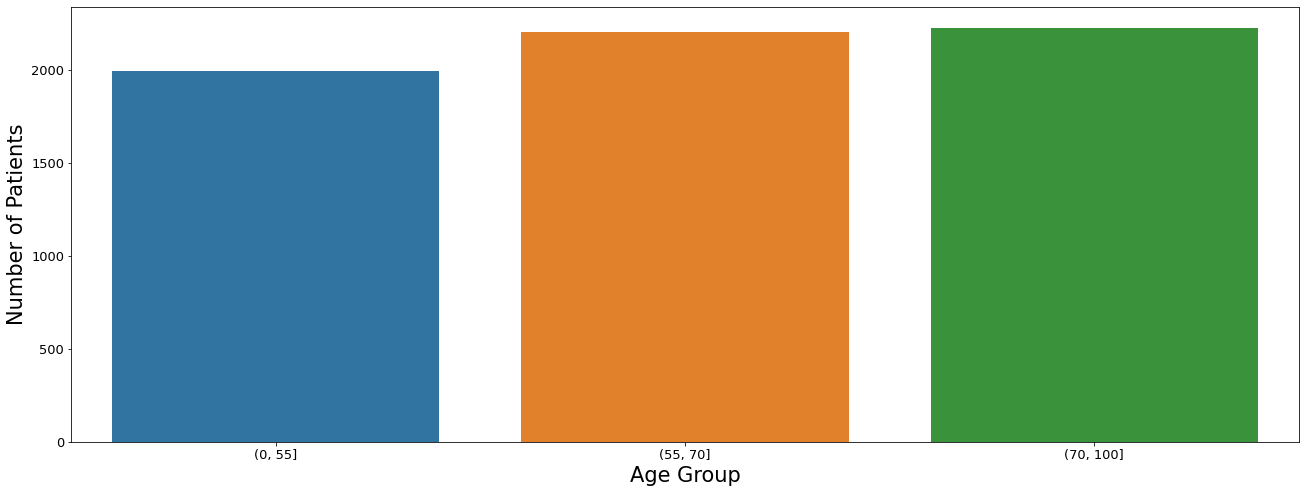

In [9]:
#Plot age group. Different groupings were tried in order to get a uniform distribution. 
fig, ax= plt.subplots(figsize= (22, 8))
g= sns.countplot(x= 'Age_Group', data= df_patient, ax= ax)

ax.set_xlabel('Age Group', fontdict= axis_label)
ax.set_ylabel('Number of Patients', fontdict= axis_label)



ax.tick_params(axis= 'both', labelsize= ticks_label['size'])



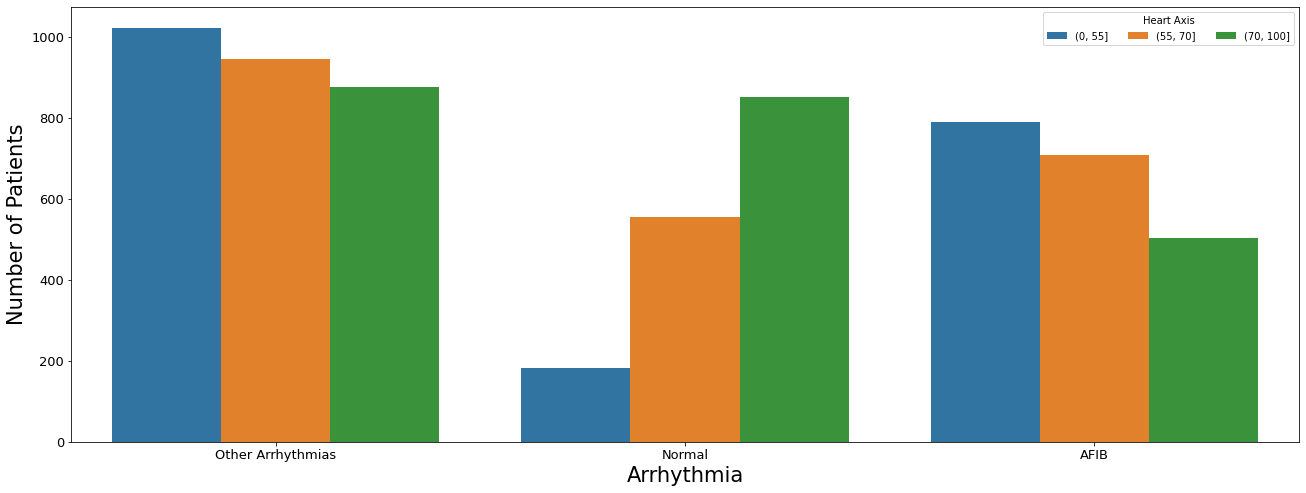

In [10]:
fig, ax= plt.subplots(figsize= (22, 8))
g= sns.countplot(x= 'ritmi', data= df_patient, ax= ax, hue= 'Age_Group')

ax.set_xlabel('Arrhythmia', fontdict= axis_label)
ax.set_ylabel('Number of Patients', fontdict= axis_label)

ax.set_xticklabels(['Other Arrhythmias', 'Normal', 'AFIB'])

ax.tick_params(axis= 'both', labelsize= ticks_label['size'])

ax.legend(ncol=3, title= "Heart Axis")

Interesting result. Looks like younger people tend to have some kind of Arryhythmia. It's possible that on the onset of arryhumthmia it gets treated immediately or they may not live long enough.

The trend from the plot suggest that Age is a significant factor in determining the Arrhythmia. Thus, will be included in the ML model.

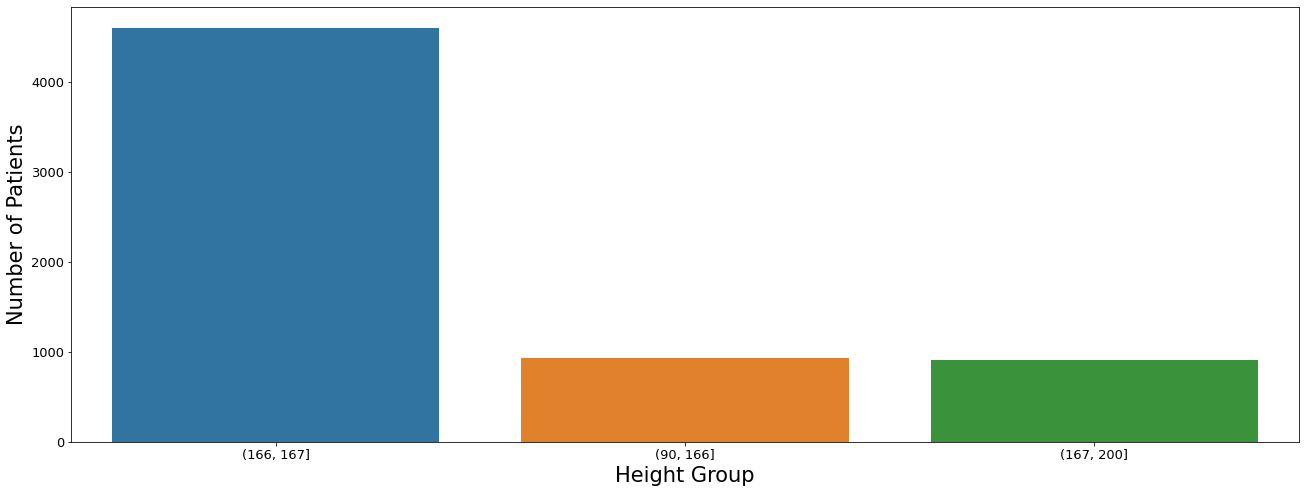

In [63]:
#Ploting height group.
fig, ax= plt.subplots(figsize= (22, 8))
g= sns.countplot(x= 'Height_Group', data= df_patient, ax= ax)

ax.set_xlabel('Height Group', fontdict= axis_label)
ax.set_ylabel('Number of Patients', fontdict= axis_label)



ax.tick_params(axis= 'both', labelsize= ticks_label['size'])

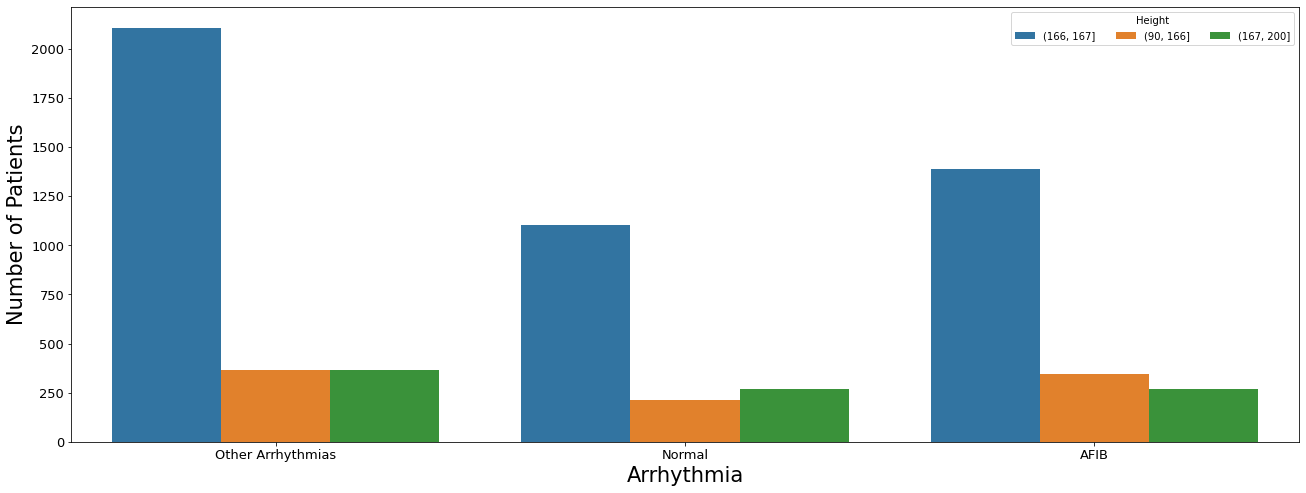

In [66]:

fig, ax= plt.subplots(figsize= (22, 8))
g= sns.countplot(x= 'ritmi', data= df_patient, ax= ax, hue= 'Height_Group')

ax.set_xlabel('Arrhythmia', fontdict= axis_label)
ax.set_ylabel('Number of Patients', fontdict= axis_label)

ax.set_xticklabels(['Other Arrhythmias', 'Normal', 'AFIB'])

ax.tick_params(axis= 'both', labelsize= ticks_label['size'])

ax.legend(ncol=3, title= "Height")

 Binning the height data turned out to be challenging. This is because majority of the data was missing and was replaced by the mean. This may be a problem for the ML. Therefore, it will be removed from the model. This should improve the model prediction and simplify the model.

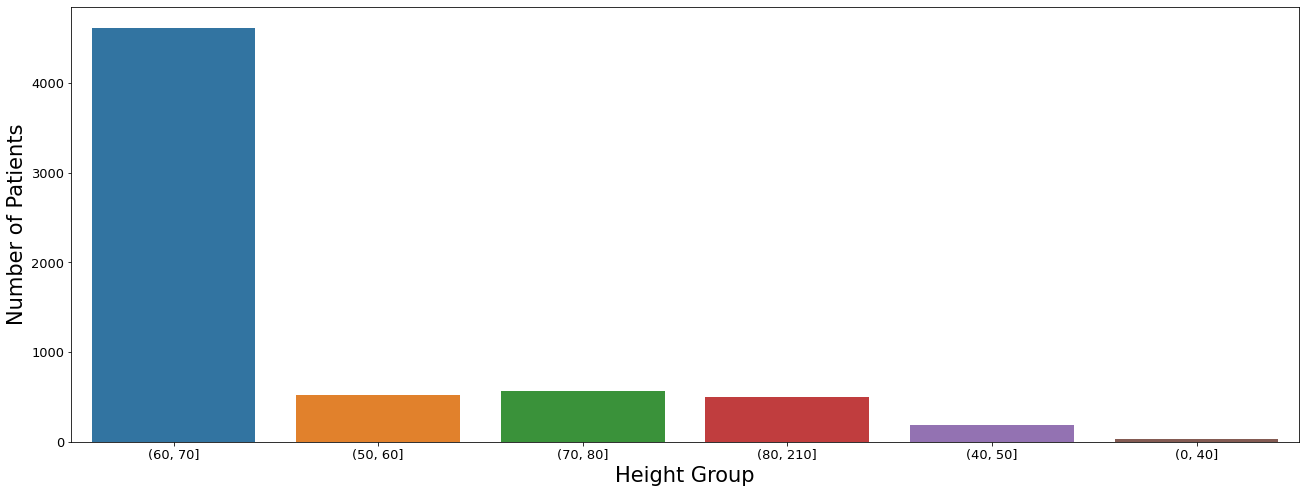

In [65]:
fig, ax= plt.subplots(figsize= (22, 8))
g= sns.countplot(x= 'Weight_Group', data= df_patient, ax= ax)

ax.set_xlabel('Height Group', fontdict= axis_label)
ax.set_ylabel('Number of Patients', fontdict= axis_label)



ax.tick_params(axis= 'both', labelsize= ticks_label['size'])

Similar to the height data. Therefore, will be eliminated from the model as well.